### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings("ignore")

### Loading the Dataset


In [3]:
# Create a connection to the database
conn = sqlite3.connect('inventory_database.db')

#fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()

,vendornumber,vendorname,brand,description,actual_price,volume,total_purchased_quantity,total_purchased_dollars,total_sales_dollars,total_excise_tax,total_sales_price,total_sales_quantity,freight_cost,gross_profit,profit_margin,stock_turnover,sales_to_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,5101919.51,260999.20,672819.31,142049.0,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,4819073.49,294438.66,561512.37,160247.0,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,4538120.60,343854.07,461140.15,187140.0,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,4475972.88,368242.80,420050.01,200412.0,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,1750.0,138109,3023206.01,4223107.62,249587.83,545778.28,135838.0,257032.07,1199901.61,28.412764,0.983556,1.396897


### Exploratory Data Analysis

* Previously, we examined the various tables in the database to identify key variables, understand their realationship and determine which ones should be include in the final analysis.
* In this phase of EDA, we will analysis the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies and ensure data quality before proceeding with further analysis.

In [4]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendornumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
actual_price,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
total_purchased_quantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
total_purchased_dollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
total_sales_dollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
total_excise_tax,10692.0,1.774226e+03,10975.582240,0.00,4.800000,46.570000,418.650000,3.682428e+05
total_sales_price,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
total_sales_quantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


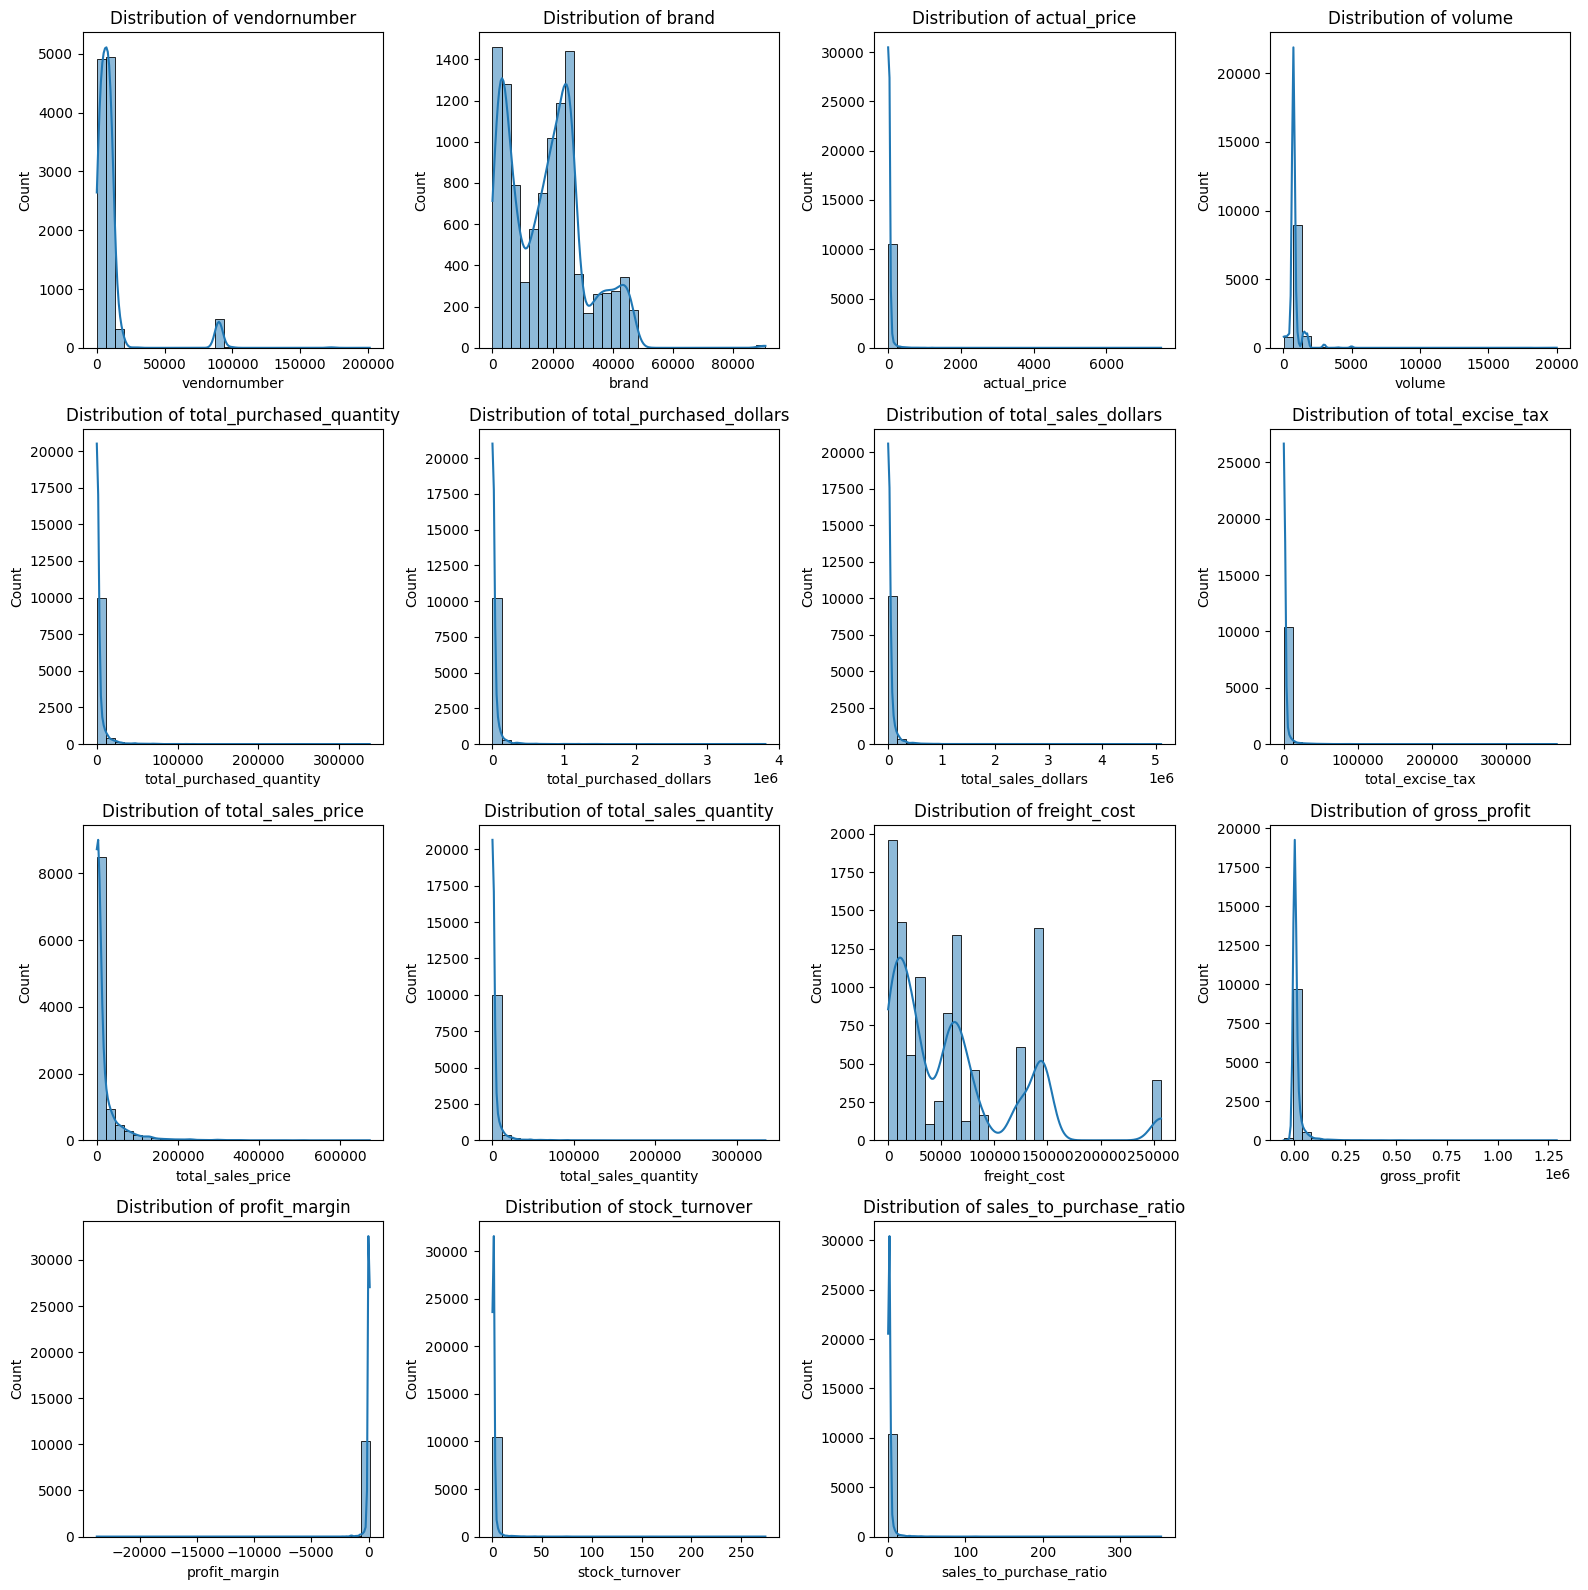

In [5]:
# Distribution plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(16, 16))  # Adjust the figure size as needed
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

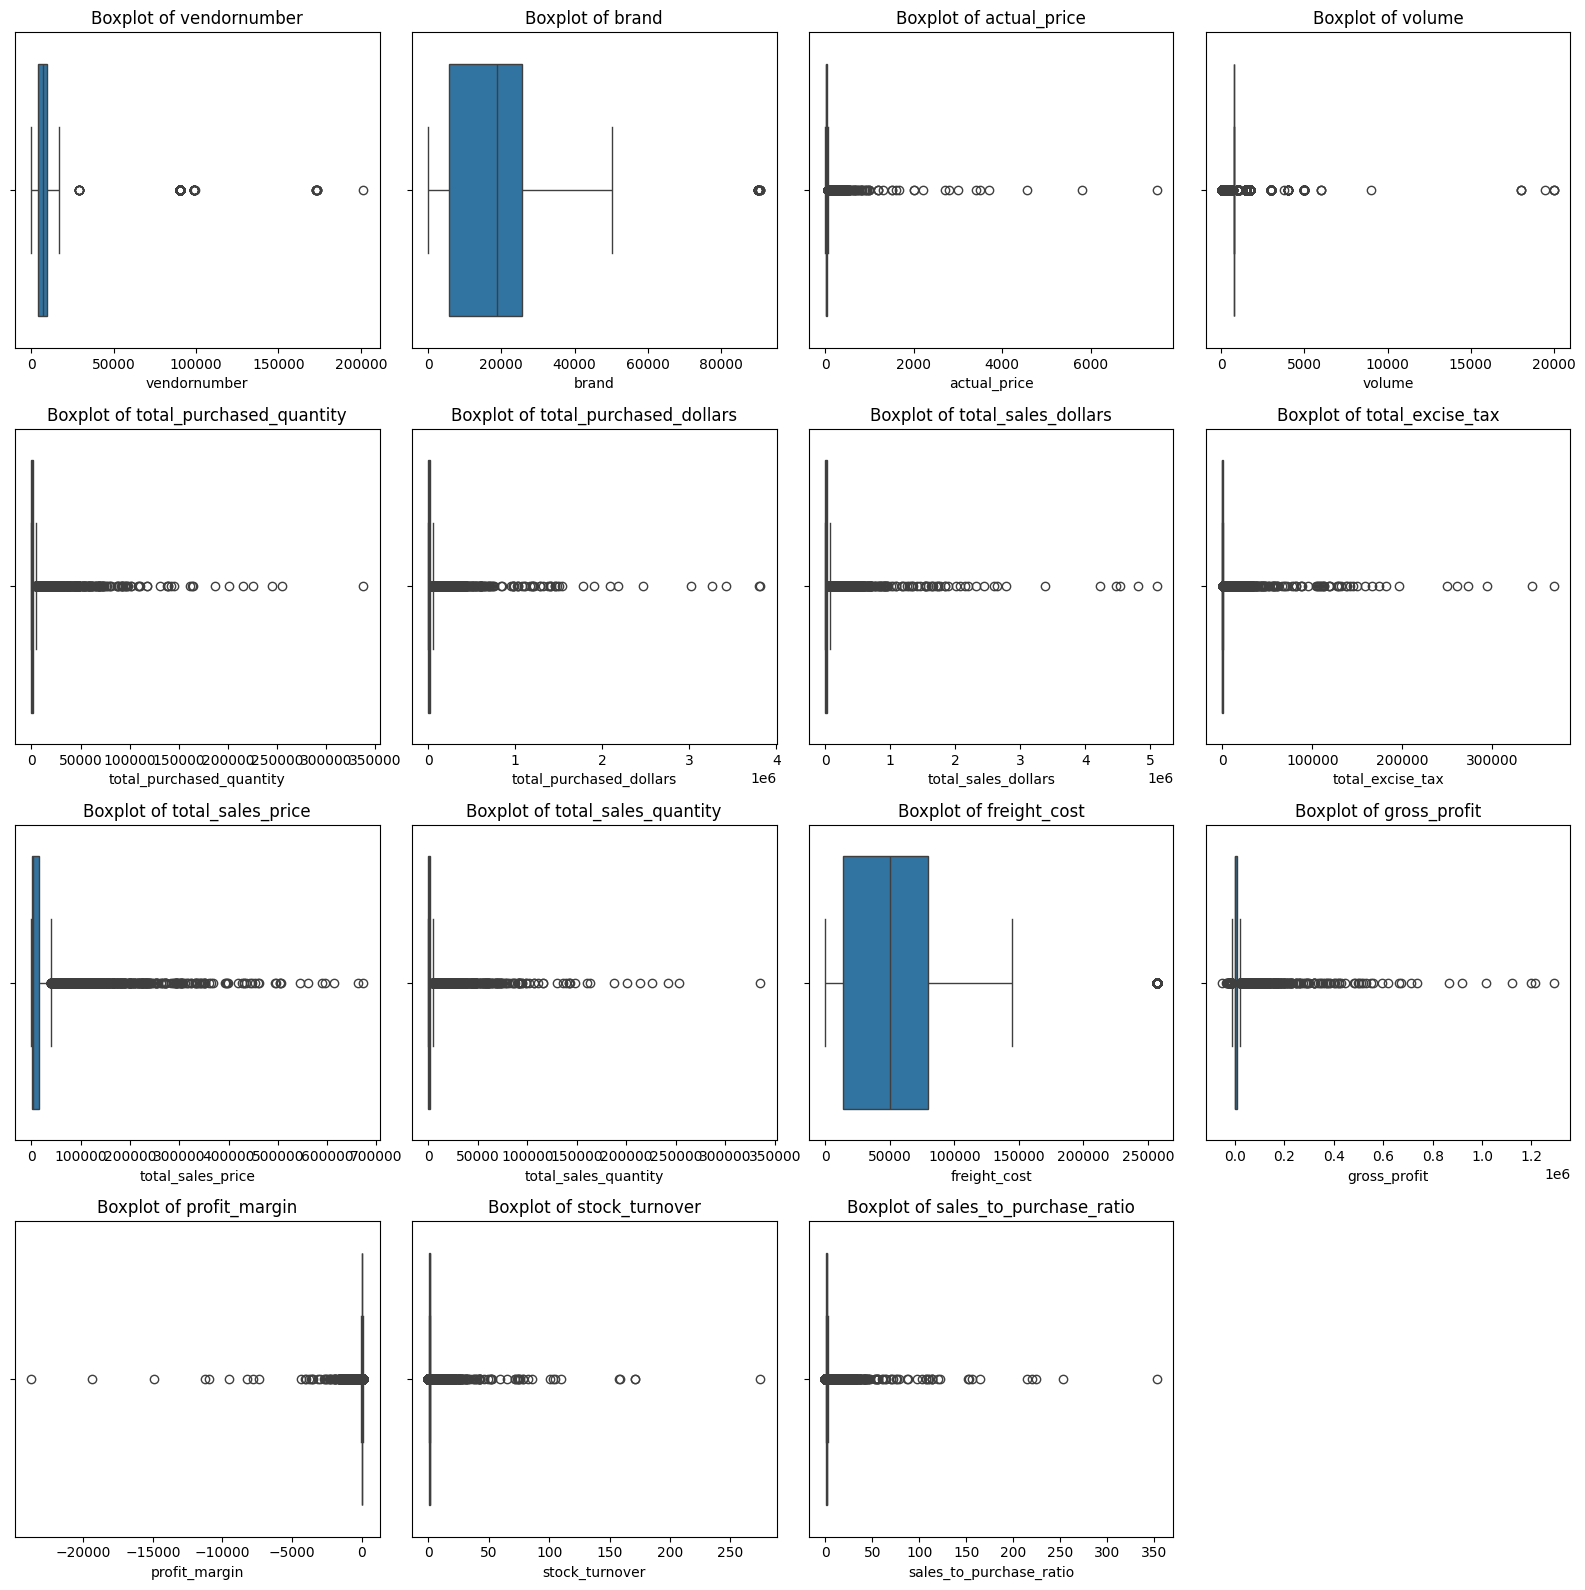

In [6]:
# Outlier Detection with boxplots
plt.figure(figsize=(16, 16)) # Adjust the figure size as needed
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()  

### Summary Statistics Insights
<b> Ngative and Zero Values:</b>
 * Gross Profit: Minimum value is -52002.78, indicating some vendors may have incurred losses. Some prduct or transaction may be selling at a loss due to  high cost or selling at discounts lower that the purchase price.
 * Profit Margin: Has a minimum of -$\infty$, indicating some vendors may have negative profit margins, suggesting they are selling products at a loss or zero profit.
 * Total Sales Quantity & Sales Dollar: Minimum values are 0, indicating that some vendors may not have made any sales. These could be slow-moving or obsolete stock.

<b> Outlier Indications by High standard Deviation:</b>
* Purchase & Actual Prices: The max values(5,681.81 & 7,499.99) are significantly higher than the mean(24.39 & 35.64), indicating potential premium products.
* Freight Cost: Huge variation from  0.09 to 257,032.07 suggesst logistics inefficiencies or bulk shipments.
* StockTurnover: Range from 0 to 274.5, implying some products sell exteremely fast while others remain stock indefinitely. Value more that 1 indicates that sold quantity for that product is higher than purachased quantity, due to either sales being fulfilled from old stock.

In [7]:
# let's filter the data by removing inconsistencies
df = pd.read_sql_query("""
SELECT *
FROM vendor_sales_summary
WHERE gross_profit > 0
AND profit_margin > 0
AND total_sales_quantity > 0                    
""",conn)

In [8]:
df

,vendornumber,vendorname,brand,description,actual_price,volume,total_purchased_quantity,total_purchased_dollars,total_sales_dollars,total_excise_tax,total_sales_price,total_sales_quantity,freight_cost,gross_profit,profit_margin,stock_turnover,sales_to_purchase_ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,5101919.51,260999.20,672819.31,142049.0,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,4819073.49,294438.66,561512.37,160247.0,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,4538120.60,343854.07,461140.15,187140.0,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,4475972.88,368242.80,420050.01,200412.0,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,1750.0,138109,3023206.01,4223107.62,249587.83,545778.28,135838.0,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,15.95,0.55,10.96,5.0,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,65.66,7.04,1.47,134.0,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.99,50.0,2,1.48,1.98,0.10,0.99,2.0,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.99,200.0,1,1.47,143.28,15.12,77.61,72.0,257032.07,141.81,98.974037,72.000000,97.469388


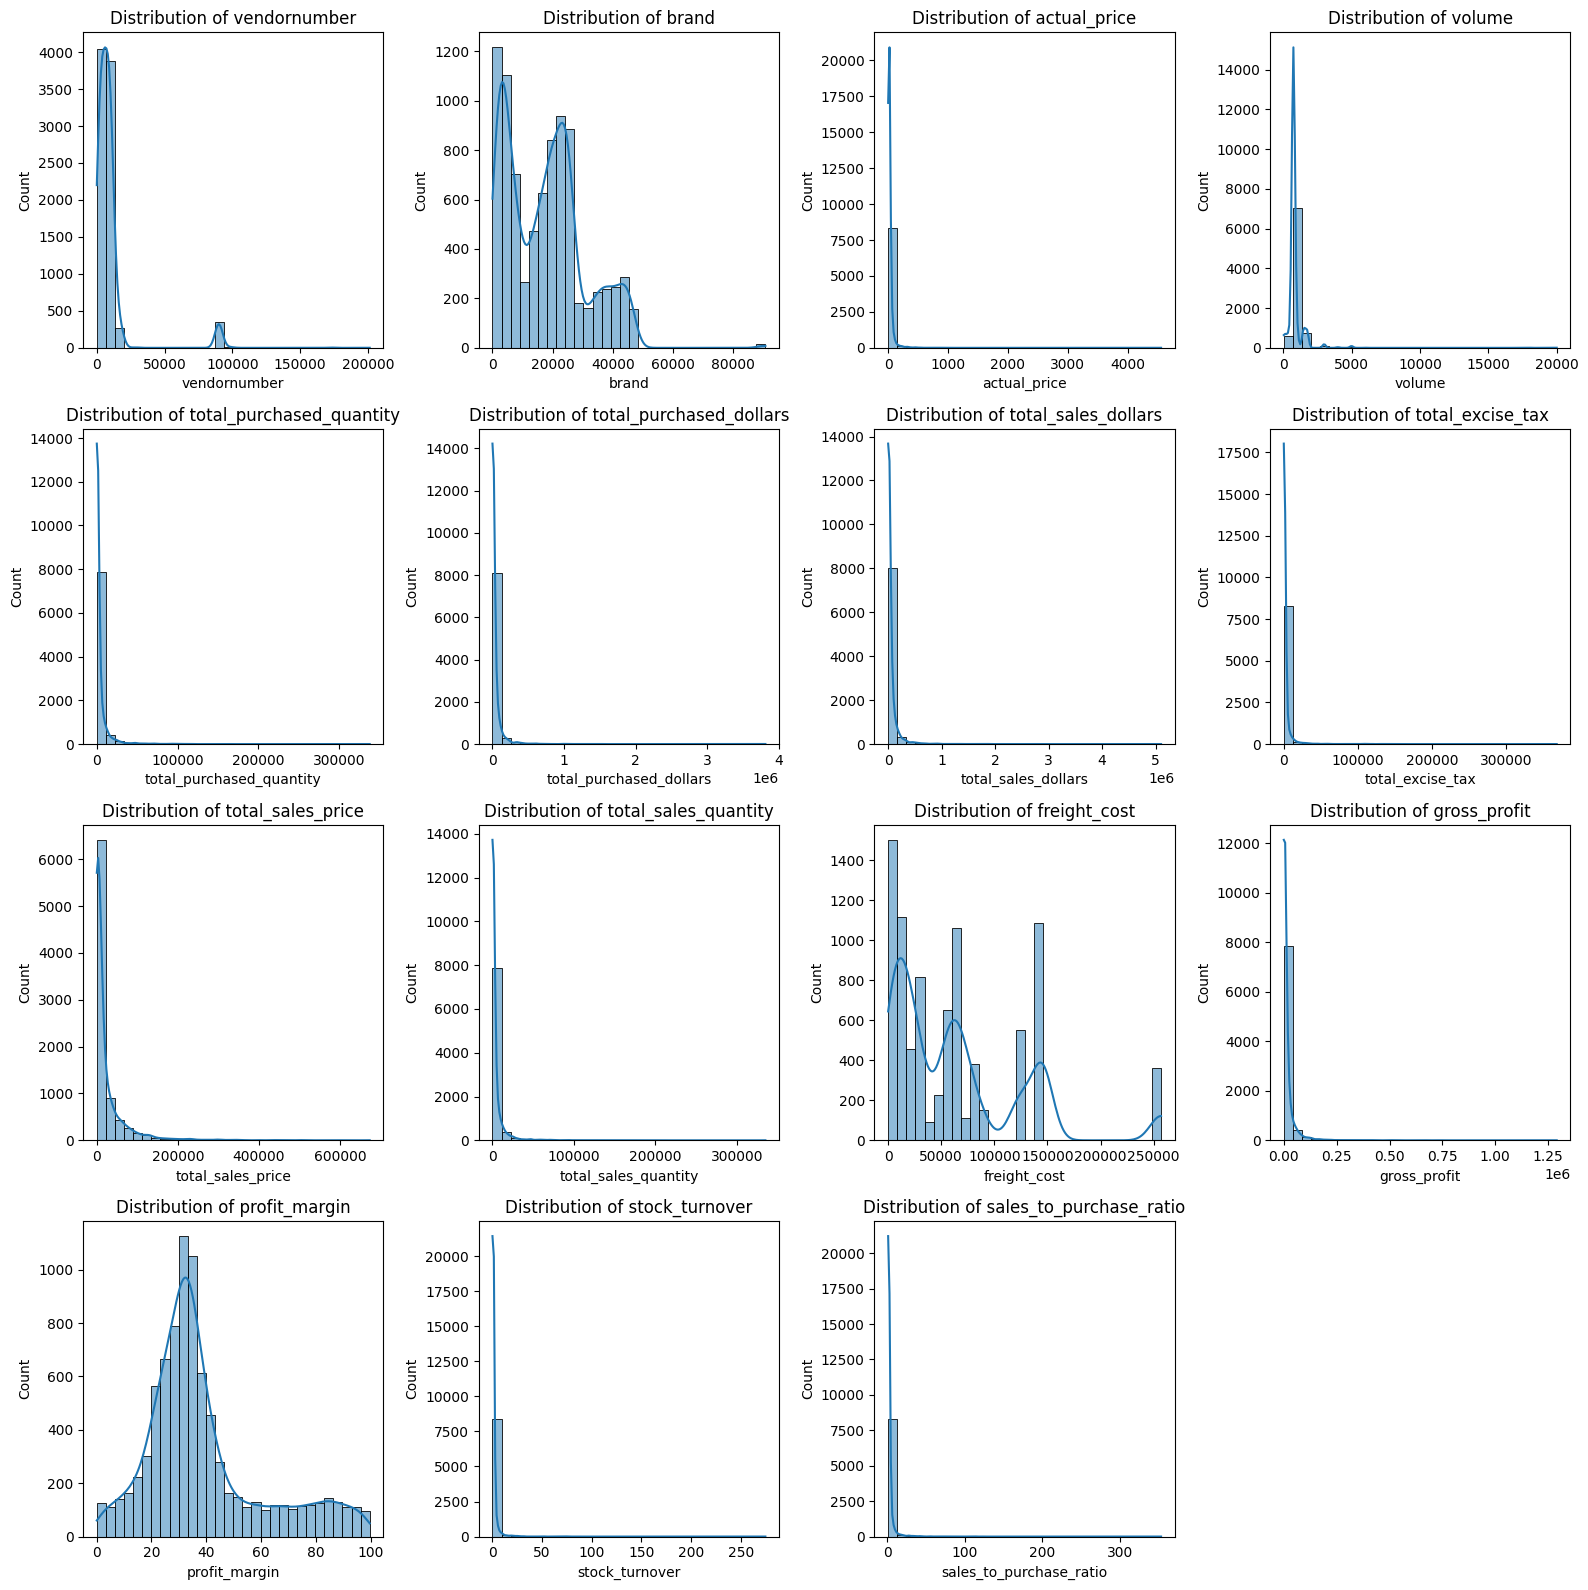

In [9]:
# Distribution plots after cleaning data for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(16, 16))  # Adjust the figure size as needed
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [10]:
df.columns

Index(['vendornumber', 'vendorname', 'brand', 'description', 'actual_price',
       'volume', 'total_purchased_quantity', 'total_purchased_dollars',
       'total_sales_dollars', 'total_excise_tax', 'total_sales_price',
       'total_sales_quantity', 'freight_cost', 'gross_profit', 'profit_margin',
       'stock_turnover', 'sales_to_purchase_ratio'],
      dtype='object')

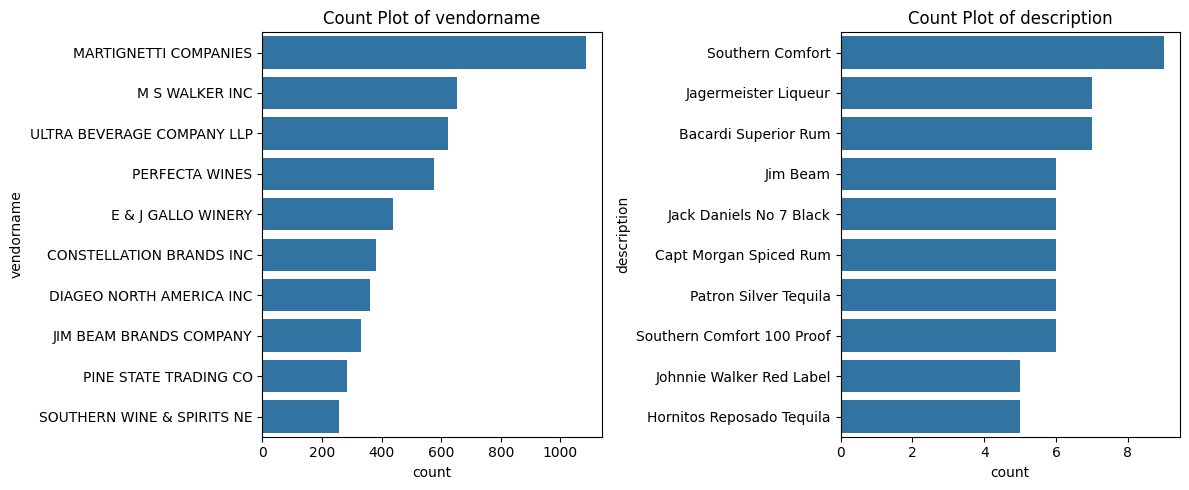

In [11]:
# Count plots for Categorical Columns
catgorical_col = ["vendorname","description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(catgorical_col):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])   # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

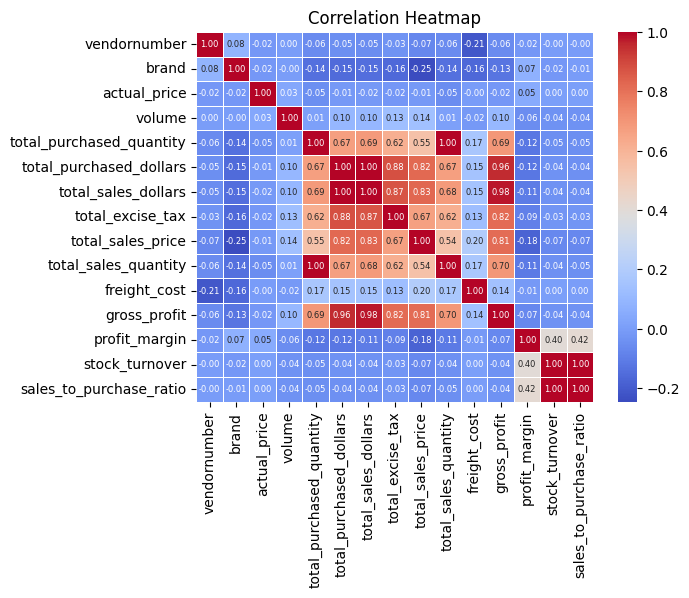

In [12]:
# Corelation Heatmap
plt.Figure(figsize=(24,16))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True, fmt=".2f",cmap="coolwarm",linewidths=.5,annot_kws={'size': 6})
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights
* Purchase_price has weak correlation with total_sales_dollars(-0.012) and Grossprofit(-0.016), suggesting that price variations do not significantly impact sales revenue or pofit.
* Strong correlation between total purchase and total sales quantity (0.999), confirming efficient inventory turnover.
* Negative correlation between profit margin and total sales price(-0.179) suggests that as sales price increases, margins decreases, possibly due to competitive pricing pressure.
* Stock Turnover has weak neagtive correlations with both Gross_profit (-0.038) and Profit_margin(-0.055), indicating that faster turnover does not necessarily result in high profibility. 

### Data Analysis

 <b> Identify Brands that needs Promotional or Price Adjustment Which exibit lower sales performance but higher porfit margins. 

In [13]:
brand_performance = df.groupby('description').agg({
    'total_sales_dollars': 'sum',
    'profit_margin':'mean'}).reset_index()

In [14]:
low_sales_threshold = brand_performance['total_sales_dollars'].quantile(0.15)
high_margin_threshold = brand_performance['profit_margin'].quantile(0.85)

In [15]:
low_sales_threshold

np.float64(560.299)

In [16]:
high_margin_threshold

np.float64(64.97017552750113)

In [17]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['total_sales_dollars'] <= low_sales_threshold) &
    (brand_performance['profit_margin'] >= high_margin_threshold)
]

print("Brand with low sales but High Profit Margins:")
display(target_brands.sort_values('total_sales_dollars'))

Brand with low sales but High Profit Margins:


,description,total_sales_dollars,profit_margin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [18]:
# for better Visulization
brand_performance = brand_performance[brand_performance['total_sales_dollars']<10000]

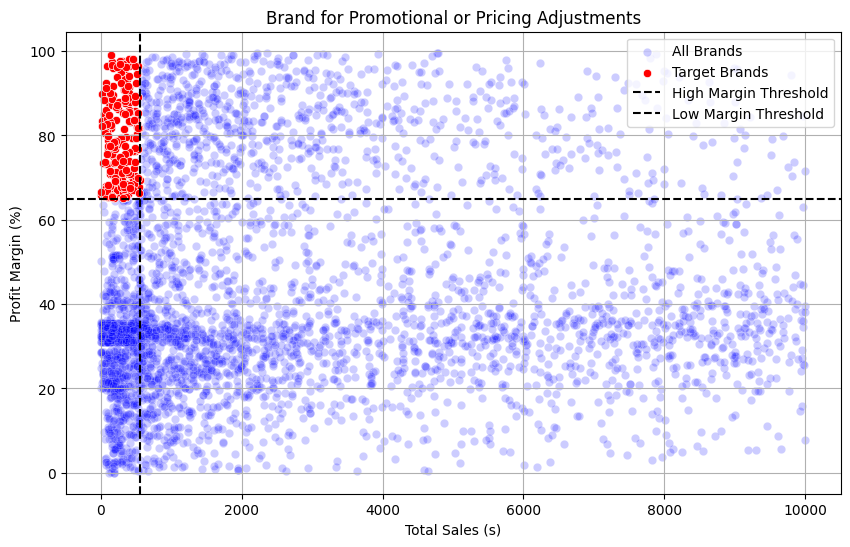

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='total_sales_dollars', y='profit_margin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x= 'total_sales_dollars', y='profit_margin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--',color='black', label = "High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--',color='black', label = "Low Margin Threshold")

plt.xlabel("Total Sales (s)")
plt.ylabel("Profit Margin (%)")
plt.title("Brand for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

<b> Which vendor and brands demonstrate the highest sales performance?

In [52]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [20]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("vendorname")["total_sales_dollars"].sum().nlargest(10)
top_brands = df.groupby("description")["total_sales_dollars"].sum().nlargest(10)

In [21]:
top_brands

description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: total_sales_dollars, dtype: float64

In [22]:
top_brands.apply(lambda x :f"{(x)/1000000:,.2f}M")

description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: total_sales_dollars, dtype: object

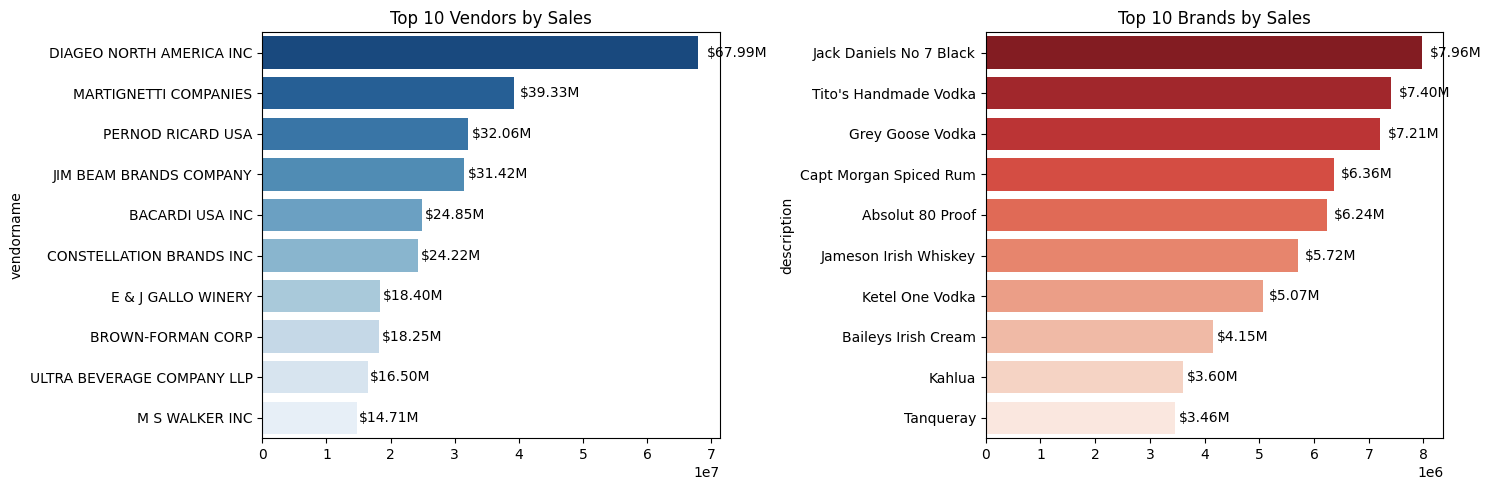

In [28]:
plt.figure(figsize=(15,5))

# plot for Top Vendor
plt.subplot(1,2,1)
ax1 = sns.barplot(y = top_vendors.index, x= top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height() / 2,
            f"${bar.get_width()/1000000:,.2f}M",
            ha ='left', va ='center', fontsize =10,color='black')
             
# plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y = top_brands.index.astype(str), x = top_brands.values   ,palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             f"${bar.get_width()/1000000:,.2f}M",
             ha= 'left', va ='center', fontsize =10,color='black')

plt.tight_layout()
plt.show()

#### Which Vendor contribute the most to total purchase dollars?

In [31]:
df.columns

Index(['vendornumber', 'vendorname', 'brand', 'description', 'actual_price',
       'volume', 'total_purchased_quantity', 'total_purchased_dollars',
       'total_sales_dollars', 'total_excise_tax', 'total_sales_price',
       'total_sales_quantity', 'freight_cost', 'gross_profit', 'profit_margin',
       'stock_turnover', 'sales_to_purchase_ratio'],
      dtype='object')

In [ ]:
vendor_performance = df.groupby('vendorname').agg({
   'total_purchased_dollars':'sum',
   'gross_profit':'sum', 
   'total_sales_dollars':'sum'
}).reset_index()

In [67]:
vendor_performance['purchase_contribution%'] = vendor_performance['total_purchased_dollars'] / vendor_performance['total_purchased_dollars'].sum()*100


In [69]:
vendor_performance=round(vendor_performance.sort_values('purchase_contribution%', ascending= False),2)

In [70]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['total_sales_dollars'] = top_vendors['total_sales_dollars'].apply(format_dollars)
top_vendors['total_purchased_dollars'] = top_vendors['total_purchased_dollars'].apply(format_dollars)
top_vendors['gross_profit'] = top_vendors['gross_profit'].apply(format_dollars)
top_vendors

,vendorname,total_purchased_dollars,gross_profit,total_sales_dollars,purchase_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [71]:
top_vendors['purchase_contribution%'].sum() 

np.float64(65.69000000000001)

In [72]:
top_vendors['cumulative_contribution%'] = top_vendors['purchase_contribution%'].cumsum()
top_vendors

,vendorname,total_purchased_dollars,gross_profit,total_sales_dollars,purchase_contribution%,cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


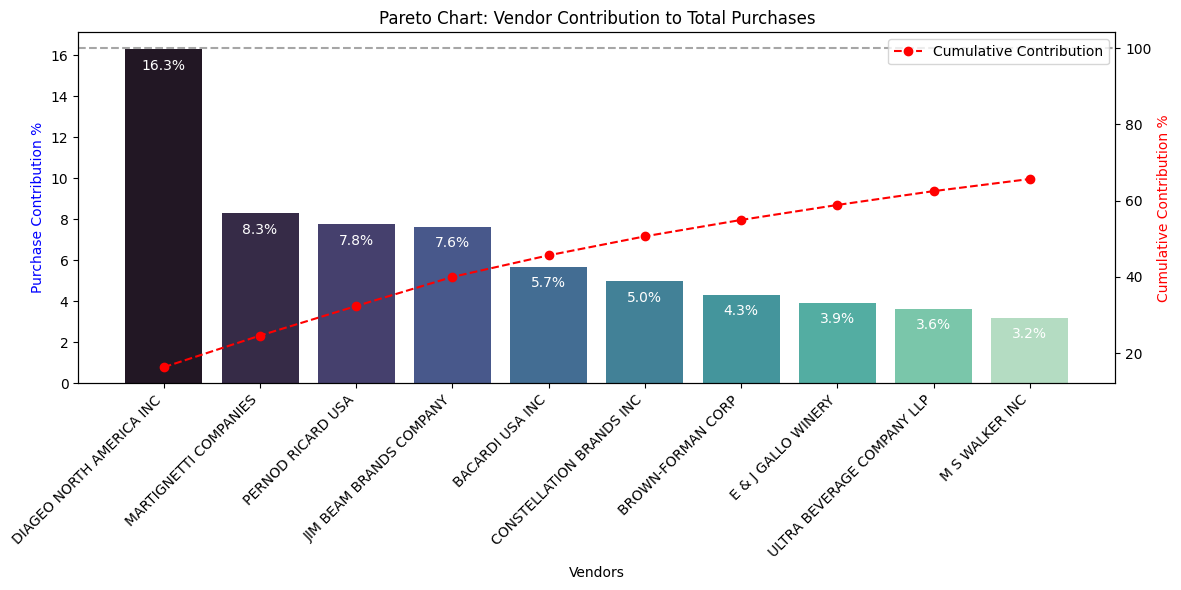

In [91]:
fig, ax1 = plt.subplots(figsize=(12, 6))  # Increased figure size for better spacing

# Bar plot for purchase contribution%
sns.barplot(x=top_vendors['vendorname'], y=top_vendors['purchase_contribution%'], palette='mako', ax=ax1)

# Add text annotations for purchase contribution%
for i, value in enumerate(top_vendors['purchase_contribution%']):
    ax1.text(i, value - 1, f"{value:.1f}%", ha='center', fontsize=10, color='white')

# Line plot for cumulative contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['vendorname'], top_vendors['cumulative_contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(top_vendors['vendorname'], rotation=45, ha='right')

# Set axis labels and title
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Add a horizontal line at 100% for cumulative contribution
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)

# Add legend for the line plot
ax2.legend(loc='upper right')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### How much of total procurement is dependent on the top vendors?


In [93]:
print(f"Total Purchase Contribution of Top 10 ventors is {round(top_vendors['purchase_contribution%'].sum(),2)}%")

Total Purchase Contribution of Top 10 ventors is 65.69%


Total Purchase Contribution of top 10 vendors is 65.69 %


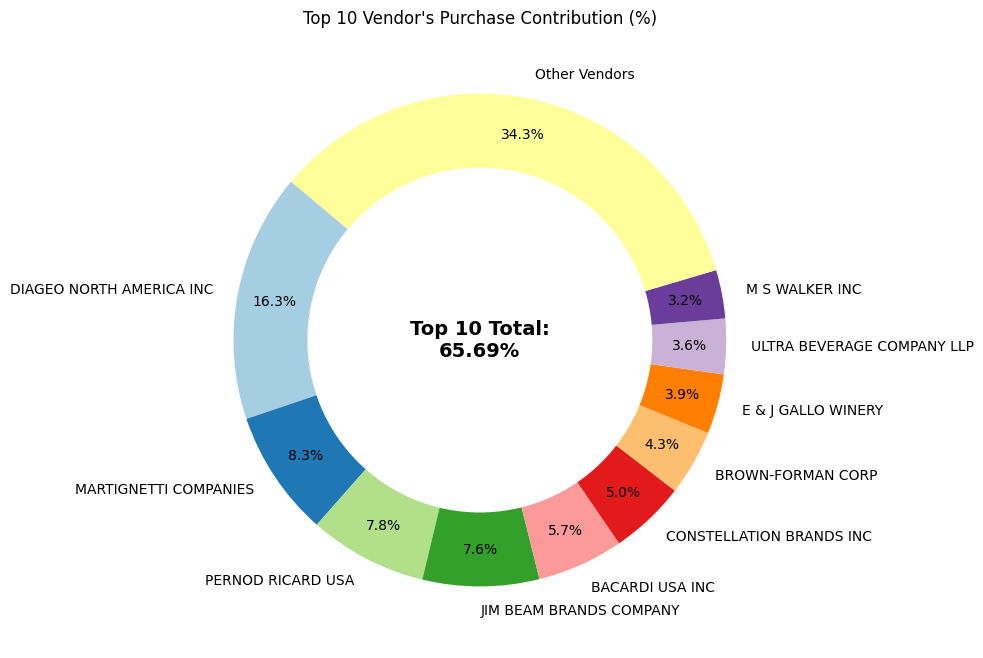

In [95]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['purchase_contribution%'].sum(),2)} %")

# Output: Total Purchase Contribution of top 10 vendors is 65.69 %

vendors = list(top_vendors['vendorname'].values)
purchase_contributions = list(top_vendors['purchase_contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


Does purchase in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [96]:
df['unit_purchase_price'] = df['total_purchased_dollars'] / df['total_purchased_quantity']

In [ ]:
df['order_size'] = pd.qcut(df['total_purchased_quantity'], q = 3, labels=["small", "medium", "large"])

In [102]:
df[['unit_purchase_price','order_size']]

,unit_purchase_price,order_size
0,26.27,large
1,23.19,large
2,18.24,large
3,16.17,large
4,21.89,large
...,...,...
8559,1.32,small
8560,0.39,small
8561,0.74,small
8562,1.47,small


In [104]:
df.groupby('order_size')[['unit_purchase_price']].mean()

,unit_purchase_price
order_size,
small,39.068186
medium,15.486414
large,10.777625


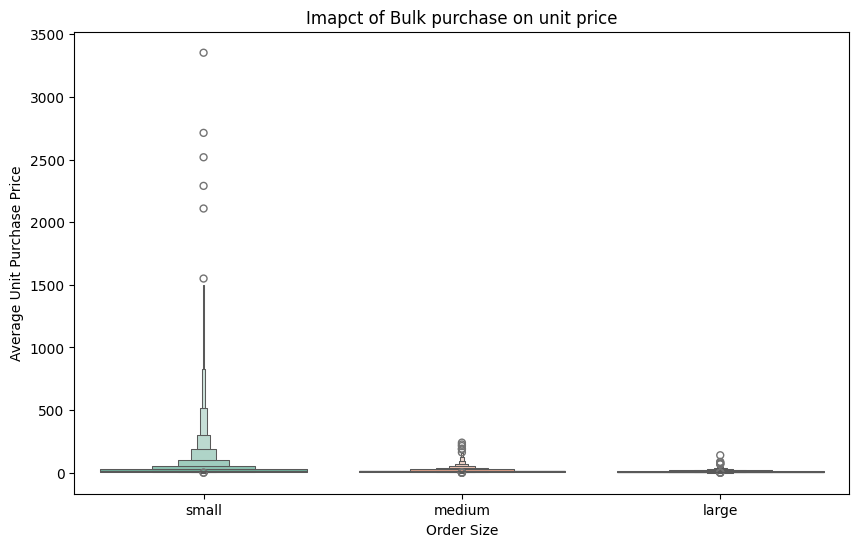

In [105]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=df, x="order_size", y="unit_purchase_price", palette="Set2")
plt.title("Imapct of Bulk purchase on unit price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

* Vendor buying in bulk (Large Order Size) get the lowest unit price($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
* The pric difference between Small and Large orders is substantial(-72% reduction in unit cost)
* This suggests that bulk pricing stratigies successfully encourage to purchase in large volumes, leading to higher overall sales despite lower per-unit revenue. 

#### Which Vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [111]:
df[df['stock_turnover']<1].groupby('vendorname')[['stock_turnover']].mean().sort_values('stock_turnover',ascending=True).head(10)


,stock_turnover
vendorname,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [116]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8564 entries, 0 to 8563
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   vendornumber              8564 non-null   int64   
 1   vendorname                8564 non-null   object  
 2   brand                     8564 non-null   int64   
 3   description               8564 non-null   object  
 4   actual_price              8564 non-null   float64 
 5   volume                    8564 non-null   float64 
 6   total_purchased_quantity  8564 non-null   int64   
 7   total_purchased_dollars   8564 non-null   float64 
 8   total_sales_dollars       8564 non-null   float64 
 9   total_excise_tax          8564 non-null   float64 
 10  total_sales_price         8564 non-null   float64 
 11  total_sales_quantity      8564 non-null   float64 
 12  freight_cost              8564 non-null   float64 
 13  gross_profit              8564 non-null   float6

In [117]:
df["unsold_inventory_value"] = (df["total_purchased_quantity"] - df["total_sales_quantity"]) * df["unit_purchase_price"]
print('Total Unsold Capital:', format_dollars(df["unsold_inventory_value"].sum()))


Total Unsold Capital: 2.71M


In [119]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("vendorname")["unsold_inventory_value"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="unsold_inventory_value", ascending=False)
inventory_value_per_vendor["unsold_inventory_value"] = inventory_value_per_vendor["unsold_inventory_value"].apply(format_dollars)
inventory_value_per_vendor.head(10)


,vendorname,unsold_inventory_value
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


#### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [121]:
top_threshold = df["total_sales_dollars"].quantile(0.75)
low_threshold = df["total_sales_dollars"].quantile(0.25)

In [122]:
top_vendors = df[df["total_sales_dollars"] >= top_threshold]["profit_margin"].dropna()
low_vendors = df[df["total_sales_dollars"] <= top_threshold]["profit_margin"].dropna()

In [123]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: profit_margin, Length: 2141, dtype: float64

In [124]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.67, 41.81), Mean: 41.24


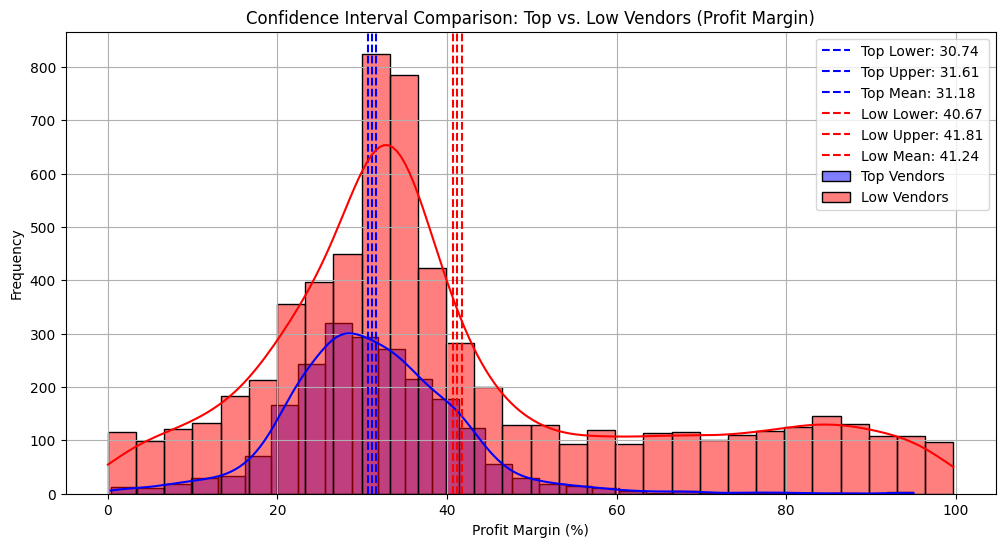

In [126]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- **For High-Performing Vendors**: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- **For Low-Performing Vendors**: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.


#### Is there a significant difference in profit margin between top-performing and low-performing vendors?
Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.



In [127]:
top_threshold = df["total_sales_dollars"].quantile(0.75)
low_threshold = df["total_sales_dollars"].quantile(0.25)

top_vendors = df[df["total_sales_dollars"] >= top_threshold]["profit_margin"].dropna()
low_vendors = df[df["total_sales_dollars"] <= low_threshold]["profit_margin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
